

**Dados:** https://dados.pbh.gov.br/dataset/populacao-de-rua

## Perguntas a serem respondidas:



# Importantando as bibliotecas:

In [1]:
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

## Coleta dos dados

In [2]:
def get_csv(name_path, name_df):
    path = name_path
    files = glob.glob(path + "/*.csv")
    name_df = pd.DataFrame()
    content = []
    for filename in files:
        df = pd.read_csv(filename,encoding="ISO-8859-1",sep=';')
        content.append(df)
    name_df = pd.concat(content)
    return name_df

In [30]:
data_2020 = pd.DataFrame()
data_2021 = pd.DataFrame()
data_2022 = pd.DataFrame()
umano = pd.DataFrame()

data_2020 = get_csv("data/2020/", data_2020)
data_2021 = get_csv("data/2021/", data_2021)
data_2022 = get_csv("data/2022/", data_2022)
umano = get_csv("data/um_ano/", umano)

In [31]:
print(len(umano))

124370


In [26]:
umano['MES_ANO_REFERENCIA'] = pd.to_datetime(umano['MES_ANO_REFERENCIA'])

In [32]:
umano['MES_ANO_REFERENCIA'].value_counts()

01/07/2022    10656
01/06/2022    10457
01/05/2022    10241
01/04/2022    10064
01/08/2022     9995
01/03/2022     9814
01/02/2022     9649
01/01/2022     9363
01/12/2021     9157
01/11/2021     8999
01/10/2021     8751
01/09/2021     8659
01/08/2021     8565
Name: MES_ANO_REFERENCIA, dtype: int64

# Agrupando todos os dados em um único Dataframe


In [79]:
df=umano
df

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,AUXILIO_BRASIL,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA,BOLSA_FAMILIA,faixa_idade
0,Ate seis meses,Nunca,09/05/2002,20,MASCULINO,NAO,SIM,Fundamental completo,Parda,Entre R$210.01 ate 0.5 Salario Minimo,0.0,CRAS VILA CEMIG,BARREIRO,ate 12 Meses,2022-01-05,NAO,
1,Ate seis meses,Quase nunca,04/06/1986,36,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,TPSA Sao Gabriel I,NORDESTE,ate 12 Meses,2022-01-05,NAO,
2,Ate seis meses,Quase nunca,02/07/1967,55,FEMININO,NAO,SIM,Medio incompleto,Preta,Entre R$210.01 ate 0.5 Salario Minimo,500.0,TPSA Centro,CENTRO SUL,ate 12 Meses,2022-01-05,NAO,
3,Ate seis meses,Todo mes,01/03/1992,30,FEMININO,NAO,SIM,Sem instrucao,Preta,Entre R$210.01 ate 0.5 Salario Minimo,0.0,CRAS VILA ANTENA,OESTE,ate 12 Meses,2022-01-05,NAO,
4,Mais de dez anos,Todo dia,03/04/1958,64,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,TPSA Centro,CENTRO SUL,ate 12 Meses,2022-01-05,NAO,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,Ate seis meses,Quase nunca,28/08/1961,61,MASCULINO,NAO,SIM,Sem instrucao,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,ate 12 Meses,2021-01-09,SIM,
8655,Entre um e dois anos,Todo mes,08/08/1981,41,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,LESTE,ate 12 Meses,2021-01-09,SIM,
8656,Ate seis meses,Quase nunca,24/09/1973,49,MASCULINO,NAO,SIM,Fundamental incompleto,Nao Informado,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,VENDA NOVA,ate 12 Meses,2021-01-09,SIM,
8657,Entre cinco e dez anos,Quase nunca,23/11/1961,61,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,ate 12 Meses,2021-01-09,SIM,


# Tratamento dos dados

**Verificar campos vazios/nulos:**


In [40]:
df.isnull().sum()

TEMPO_VIVE_NA_RUA                         0
CONTATO_PARENTE_FORA_RUAS                 0
DATA_NASCIMENTO                           0
IDADE                                     0
SEXO                                      0
AUXILIO_BRASIL                        44131
POP_RUA                                   0
GRAU_INSTRUCAO                            0
COR_RACA                                  0
Faixa da renda familiar per capita        0
VAL_REMUNERACAO_MES_PASSADO             468
CRAS                                      0
REGIONAL                                  0
FAIXA_DESATUALICACAO_CADASTRAL            0
MES_ANO_REFERENCIA                        0
BOLSA_FAMILIA                         80239
dtype: int64

* É possível observar que apesar de todos os campos de data de nascimento estarem devidamente preenchidos, alguns dos campos de idade não estão.

**Verificar os tipos dos dados:**

In [41]:
df.dtypes

TEMPO_VIVE_NA_RUA                             object
CONTATO_PARENTE_FORA_RUAS                     object
DATA_NASCIMENTO                               object
IDADE                                          int64
SEXO                                          object
AUXILIO_BRASIL                                object
POP_RUA                                       object
GRAU_INSTRUCAO                                object
COR_RACA                                      object
Faixa da renda familiar per capita            object
VAL_REMUNERACAO_MES_PASSADO                  float64
CRAS                                          object
REGIONAL                                      object
FAIXA_DESATUALICACAO_CADASTRAL                object
MES_ANO_REFERENCIA                    datetime64[ns]
BOLSA_FAMILIA                                 object
dtype: object

* Alguns detalhes importantes: A data_nascimento não está no formato date e os campos idade e val_remuneracao_mes_passado estão no formato float.

* Um dicionário com os tipos de cada atributo é fornecido juntamente ao banco de dados, contudo ele mostrou-se não confiável.

## Utilizando a data de nascimento para cálculo da idade:

* Convertendo MES_ANO_REFERENCIA de objetct para datetime


In [80]:
df['MES_ANO_REFERENCIA'] = pd.to_datetime(df['MES_ANO_REFERENCIA'])


In [81]:
df['BOLSA_FAMILIA']= df['BOLSA_FAMILIA'].fillna('NAO')
df['AUXILIO_BRASIL'] = df['AUXILIO_BRASIL'].fillna('NAO')
df['TEMPO_VIVE_NA_RUA'] = df['TEMPO_VIVE_NA_RUA'].fillna('NA')

In [82]:
df = df.drop(columns = ['VAL_REMUNERACAO_MES_PASSADO'])

## Visualização - gráficos

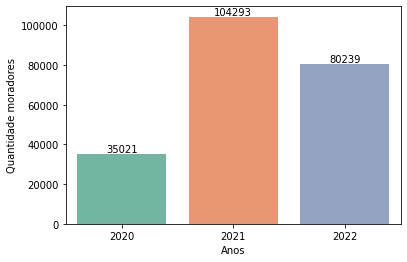

In [34]:
anos = ['2020','2021','2022']
contagem_anos = [len(data_2020),len(data_2021),len(data_2022)]


data_plot = pd.DataFrame({"Anos":anos, "Quantidade moradores":contagem_anos})

ax = sns.barplot(x = "Anos", y = "Quantidade moradores", data=data_plot, palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


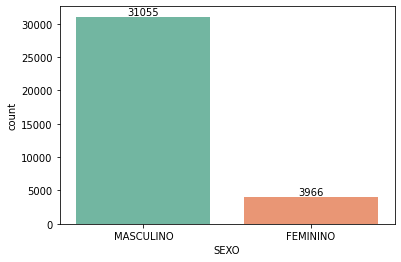

In [83]:
ax =sns.countplot(x='SEXO', data=data_2020,palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

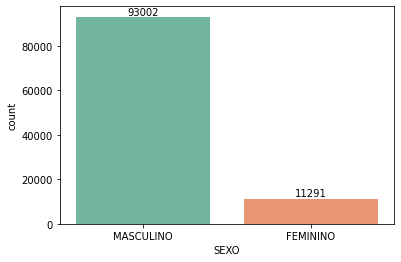

In [84]:
ax =sns.countplot(x='SEXO', data=data_2021,palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

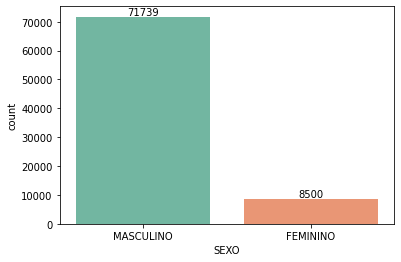

In [61]:
ax =sns.countplot(x='SEXO', data=data_2022,palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Tratamento dos dados - Previsão

In [100]:
umano['faixa_idade']= ""

In [101]:
umano['IDADE']

0       20
1       36
2       55
3       30
4       64
        ..
8654    61
8655    41
8656    49
8657    61
8658    52
Name: IDADE, Length: 124370, dtype: int64

In [102]:
for row in range(len(umano)):
    if umano["IDADE"][row] < 18:
        umano['faixa_idade'][row] = "Menos de 18 anos"
    elif 18 <= umano["IDADE"][row] and umano["IDADE"][row] < 35:
        umano['faixa_idade'][row] = "Entre 18 e 35 anos"
    elif 35 <= umano["IDADE"][row] and umano["IDADE"][row] <55:
        umano["faixa_idade"][row] = "Entre 35 e 55 anos"
    elif 55 <= umano["IDADE"][row] and umano["IDADE"][row] <75:
        umano["faixa_idade"][row] = "Entre 55 e 75 anos"
    else:
        umano["faixa_idade"][row] = "75 ou mais anos"


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [86]:
df.head()

,ï»¿TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA,TEMPO_VIVE_NA_RUA,AUXILIO_BRASIL
0,Ate seis meses,Quase nunca,05/03/1992,30,MASCULINO,NAO,SIM,Medio incompleto,Preta,Ate R$89.00,CRAS VILA SAO JOSE,PAMPULHA,ate 12 Meses,2020-01-12,NaN,NAO
1,Ate seis meses,Quase nunca,04/06/1986,36,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,ENDERECO FORA AREA CRAS,NORDESTE,ate 12 Meses,2020-01-12,NaN,NAO
2,Ate seis meses,Todo dia,03/04/1958,64,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,ENDERECO FORA AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-12,NaN,NAO
3,Entre seis meses e um ano,Toda semana,15/09/1975,47,FEMININO,NAO,SIM,Fundamental completo,Preta,Entre R$178.01 ate 0.5 Salario Minimo,CRAS HAVAI VENTOSA,OESTE,13 a 18 Meses,2020-01-12,NaN,NAO
4,Ate seis meses,Toda semana,02/11/1996,26,MASCULINO,NAO,SIM,Medio completo,Parda,Acima de 0.5 Salario Minimo,CRAS VILA MARIA,NORDESTE,19 a 24 Meses,2020-01-12,NaN,NAO


In [45]:
df.keys()

Index(['TEMPO_VIVE_NA_RUA', 'CONTATO_PARENTE_FORA_RUAS', 'DATA_NASCIMENTO',
       'IDADE', 'SEXO', 'AUXILIO_BRASIL', 'POP_RUA', 'GRAU_INSTRUCAO',
       'COR_RACA', 'Faixa da renda familiar per capita', 'CRAS', 'REGIONAL',
       'FAIXA_DESATUALICACAO_CADASTRAL', 'MES_ANO_REFERENCIA',
       'BOLSA_FAMILIA'],
      dtype='object')

##Convertendo tempo que vive na rua

In [65]:
df['IDADE'].describe()

count    124370.000000
mean         43.363223
std          11.758397
min           0.000000
25%          35.000000
50%          43.000000
75%          52.000000
max          90.000000
Name: IDADE, dtype: float64

In [55]:
df['TEMPO_VIVE_NA_RUA'].value_counts()

Ate seis meses               35573
Entre dois e cinco anos      24124
Mais de dez anos             18030
Entre cinco e dez anos       16589
Entre seis meses e um ano    15837
Entre um e dois anos         14217
Name: TEMPO_VIVE_NA_RUA, dtype: int64

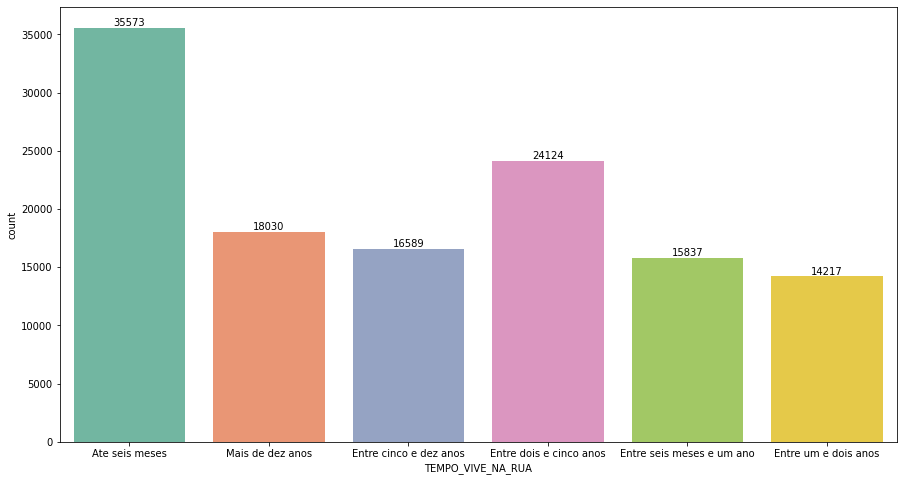

In [53]:
plt.figure(figsize=(15,8))
ax =sns.countplot(x='TEMPO_VIVE_NA_RUA', data=umano,palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [56]:
#tempo que vive na rua
df['CONTATO_PARENTE_FORA_RUAS'].value_counts()

Nunca          54259
Quase nunca    28616
Todo mes       17873
Toda semana    12223
Todo ano        6330
Todo dia        5069
Name: CONTATO_PARENTE_FORA_RUAS, dtype: int64

In [57]:
#sexo
df['SEXO'].value_counts()

MASCULINO    111251
FEMININO      13119
Name: SEXO, dtype: int64

In [58]:
#GRAU DE INSTRUÇÃO
df['GRAU_INSTRUCAO'].value_counts()

Fundamental incompleto         63586
Medio completo                 18864
Fundamental completo           18244
Medio incompleto               12727
Sem instrucao                   9384
Superior incompleto ou mais     1431
Nao Informado                    134
Name: GRAU_INSTRUCAO, dtype: int64

In [91]:
df['TEMPO_DE_RUA'] = df['TEMPO_VIVE_NA_RUA'].map({"Ate seis meses":0,"Entre seis meses e um ano":1,
                                                       'Entre um e dois anos':2, 'Entre dois e cinco anos':3,
                                                       'Entre cinco e dez anos':4, 'Mais de dez anos':5},na_action='ignore')

df.drop(columns = ['TEMPO_VIVE_NA_RUA'])
df.head()

,ï»¿TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA,TEMPO_VIVE_NA_RUA,AUXILIO_BRASIL,TEMPO_DE_RUA
0,Ate seis meses,Quase nunca,05/03/1992,30,MASCULINO,NAO,SIM,Medio incompleto,Preta,Ate R$89.00,CRAS VILA SAO JOSE,PAMPULHA,ate 12 Meses,2020-01-12,NaN,NAO,NaN
1,Ate seis meses,Quase nunca,04/06/1986,36,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,ENDERECO FORA AREA CRAS,NORDESTE,ate 12 Meses,2020-01-12,NaN,NAO,NaN
2,Ate seis meses,Todo dia,03/04/1958,64,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,ENDERECO FORA AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-12,NaN,NAO,NaN
3,Entre seis meses e um ano,Toda semana,15/09/1975,47,FEMININO,NAO,SIM,Fundamental completo,Preta,Entre R$178.01 ate 0.5 Salario Minimo,CRAS HAVAI VENTOSA,OESTE,13 a 18 Meses,2020-01-12,NaN,NAO,NaN
4,Ate seis meses,Toda semana,02/11/1996,26,MASCULINO,NAO,SIM,Medio completo,Parda,Acima de 0.5 Salario Minimo,CRAS VILA MARIA,NORDESTE,19 a 24 Meses,2020-01-12,NaN,NAO,NaN


In [ ]:
df['COR_RACA'].value_counts()

Parda            57432
Preta            22134
Branca           14978
Amarela            425
Nao Informado      115
Indigena            99
Name: COR_RACA, dtype: int64

##Contato parente fora das ruas

In [92]:
df['CONTATO_PARENTE'] = df['CONTATO_PARENTE_FORA_RUAS'].map({"Nunca":0,"Quase nunca":1,
                                                       'Todo ano':2, 'Todo mes':3,
                                                       'Toda semana':4, 'Todo dia':5},na_action='ignore')


In [93]:
df['SEXO_MF'] = df['SEXO'].map({"MASCULINO":0,"FEMININO":1},na_action='ignore')

In [94]:
df['BOLSA'] = df['BOLSA_FAMILIA'].map({"SIM":1,"NAO":0},na_action='ignore')
df.head()

,ï»¿TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA,TEMPO_VIVE_NA_RUA,AUXILIO_BRASIL,TEMPO_DE_RUA,CONTATO_PARENTE,SEXO_MF,BOLSA
0,Ate seis meses,Quase nunca,05/03/1992,30,MASCULINO,NAO,SIM,Medio incompleto,Preta,Ate R$89.00,CRAS VILA SAO JOSE,PAMPULHA,ate 12 Meses,2020-01-12,NaN,NAO,NaN,1,0,0
1,Ate seis meses,Quase nunca,04/06/1986,36,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,ENDERECO FORA AREA CRAS,NORDESTE,ate 12 Meses,2020-01-12,NaN,NAO,NaN,1,0,0
2,Ate seis meses,Todo dia,03/04/1958,64,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,ENDERECO FORA AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-12,NaN,NAO,NaN,5,1,0
3,Entre seis meses e um ano,Toda semana,15/09/1975,47,FEMININO,NAO,SIM,Fundamental completo,Preta,Entre R$178.01 ate 0.5 Salario Minimo,CRAS HAVAI VENTOSA,OESTE,13 a 18 Meses,2020-01-12,NaN,NAO,NaN,4,1,0
4,Ate seis meses,Toda semana,02/11/1996,26,MASCULINO,NAO,SIM,Medio completo,Parda,Acima de 0.5 Salario Minimo,CRAS VILA MARIA,NORDESTE,19 a 24 Meses,2020-01-12,NaN,NAO,NaN,4,0,0


##Grau de instrução

In [95]:
df['G_INSTRUCAO'] = df['GRAU_INSTRUCAO'].map({"Nao Informado":0,"Sem instrucao":1,
                                                       'Fundamental incompleto':2, 'Fundamental completo':3,
                                                       'Medio incompleto':4, 'Medio completo':5,
                                              'Superior incompleto ou mais':6},na_action='ignore')

##Cor raça

In [96]:
df['COR_R'] = df['COR_RACA'].map({"Nao Informado":0,"Preta":1,'Branca':2, 'Amarela':3,
                                  'Parda':4, 'Indigena':5},na_action='ignore')

#Análise Preditiva

**Montando o dataframe somente com os dados relevantes para a análise:**

In [ ]:
df.keys()

Index(['TEMPO_VIVE_NA_RUA', 'CONTATO_PARENTE_FORA_RUAS', 'DATA_NASCIMENTO',
       'IDADE', 'SEXO', 'BOLSA_FAMILIA', 'POP_RUA', 'GRAU_INSTRUCAO',
       'COR_RACA', 'Faixa da renda familiar per capita', 'CRAS', 'REGIONAL',
       'FAIXA_DESATUALICACAO_CADASTRAL', 'MES_ANO_REFERENCIA', 'TEMPO_DE_RUA',
       'CONTATO_PARENTE', 'SEXO_MF', 'BOLSA', 'G_INSTRUCAO', 'COR_R'],
      dtype='object')

/var/folders/7y/h9psskk95z5_qbfrvcsl1_bw0000gp/T/ipykernel_1596/2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot:>

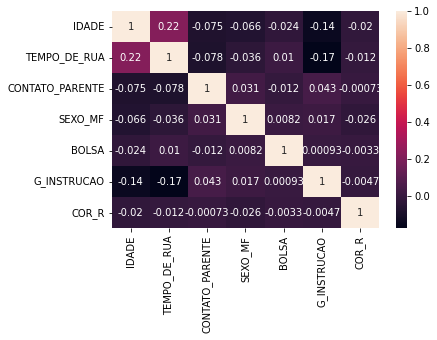

In [97]:
sns.heatmap(df.corr(),annot = True)

In [98]:
df_pred = df[{'IDADE','G_INSTRUCAO','BOLSA','SEXO_MF','CONTATO_PARENTE','COR_R','TEMPO_DE_RUA'}]
df_pred.keys()

/var/folders/7y/h9psskk95z5_qbfrvcsl1_bw0000gp/T/ipykernel_1596/4174713087.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_pred = df[{'IDADE','G_INSTRUCAO','BOLSA','SEXO_MF','CONTATO_PARENTE','COR_R','TEMPO_DE_RUA'}]


Index(['CONTATO_PARENTE', 'G_INSTRUCAO', 'SEXO_MF', 'TEMPO_DE_RUA', 'IDADE',
       'BOLSA', 'COR_R'],
      dtype='object')

<AxesSubplot:>

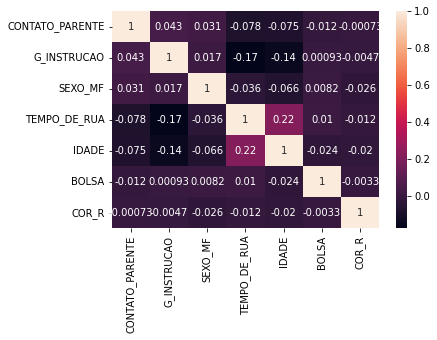

In [99]:
sns.heatmap(df_pred.corr(),annot = True)

In [100]:
corr = df_pred.corr('spearman')
corr = corr[['IDADE']].sort_values(by = ['IDADE'],ascending = False)
corr

,IDADE
IDADE,1.000000
TEMPO_DE_RUA,0.222137
BOLSA,-0.013862
COR_R,-0.017670
SEXO_MF,-0.051101
CONTATO_PARENTE,-0.062647
G_INSTRUCAO,-0.182932


In [101]:
corr = df_pred.corr('spearman')
corr = corr[['SEXO_MF']].sort_values(by = ['SEXO_MF'],ascending = False)
corr

,SEXO_MF
SEXO_MF,1.000000
CONTATO_PARENTE,0.030600
G_INSTRUCAO,0.011114
BOLSA,0.008226
COR_R,-0.025848
TEMPO_DE_RUA,-0.035041
IDADE,-0.051101


In [102]:
corr = df_pred.corr('spearman')
corr = corr[['TEMPO_DE_RUA']].sort_values(by = ['TEMPO_DE_RUA'],ascending = False)
corr

,TEMPO_DE_RUA
TEMPO_DE_RUA,1.000000
IDADE,0.222137
BOLSA,0.010857
COR_R,-0.012279
SEXO_MF,-0.035041
CONTATO_PARENTE,-0.063202
G_INSTRUCAO,-0.173980


In [103]:
corr = df_pred.corr('spearman')
corr = corr[['COR_R']].sort_values(by = ['COR_R'],ascending = False)
corr

,COR_R
COR_R,1.000000
CONTATO_PARENTE,0.000860
G_INSTRUCAO,-0.000019
BOLSA,-0.003502
TEMPO_DE_RUA,-0.012279
IDADE,-0.017670
SEXO_MF,-0.025848


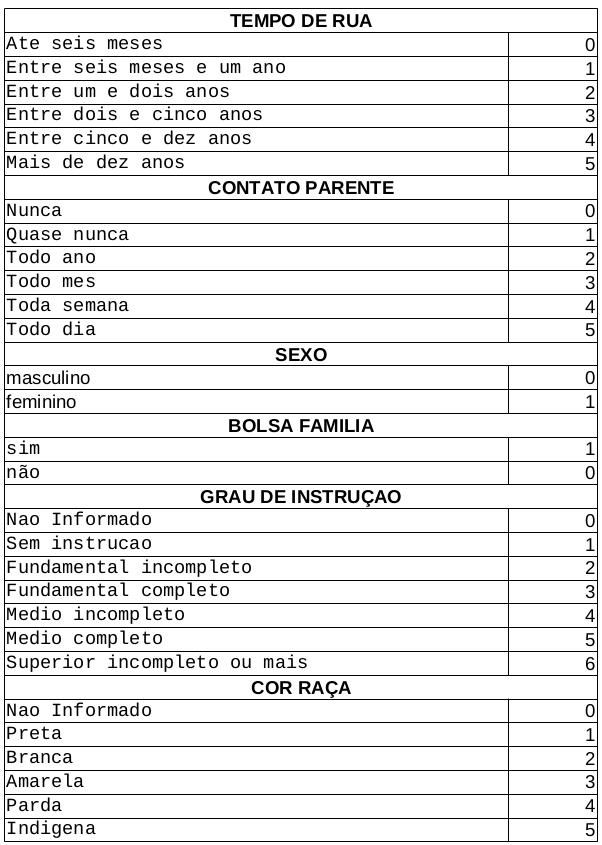

##PREDIÇÃO:

In [104]:
#IMPORTS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [105]:
df_pred.head()

,CONTATO_PARENTE,G_INSTRUCAO,SEXO_MF,TEMPO_DE_RUA,IDADE,BOLSA,COR_R
0,1,4,0,NaN,30,0,1
1,1,4,0,NaN,36,0,4
2,5,2,1,NaN,64,0,4
3,4,3,1,NaN,47,0,1
4,4,5,0,NaN,26,0,4


In [106]:
X = df_pred.drop(columns=['TEMPO_DE_RUA'])
y = df_pred['TEMPO_DE_RUA']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [107]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

ValueError: Input y contains NaN.

In [ ]:
p = model.predict(X_test)

In [ ]:
accuracy_score(y_test, p)

0.5727267951883175

Ao tentar prever o Tempo que um morador está na rua utilizando todos os atributos do dataframe encontramos uma acurácia de 0.57 o que nos diz que esse não é o melhor target que podemos utilizar

In [ ]:
X = df_pred.drop(columns=['COR_R'])
y = df_pred['COR_R']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
p = model.predict(X_test)
accuracy_score(y_test, p)

0.7787991805431528

In [ ]:
#Criar subconjunto para IDADE
X = df_pred.drop(columns=["IDADE"])
y = df_pred["IDADE"]
X_treino, X_teste,y_treino,  y_teste = train_test_split(X,y, test_size = 0.1)

In [ ]:
#Criar modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
previsao = modelo.predict(X_teste)
accuracy_score(y_teste,previsao)

0.16598382183002416

A tentativa de prever a idade dos moradores de rua foi a que teve pior acurácia entre nosssos testes com valor de 0.1687

In [ ]:
# [bolsa, idade, tempo de rua, contato com parente, sexo, cor, grau de instrução]
#prever a idade de uma pessoa que
previsao = modelo.predict([[1,2,3,1,1,2]])
previsao

array([43])

A idade provavel de um homem com as caracteristicas {1,2,3,1,1,2} é 35 anos.

In [ ]:
#Criar subconjunto para COR/RACA
X = df_pred.drop(columns=["COR_R"])
y = df_pred["COR_R"]
X_treino, X_teste,y_treino,  y_teste = train_test_split(X,y, test_size = 0.1)

In [ ]:
#Criar modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# [bolsa, idade, tempo de rua, contato com parente, sexo, cor, grau de instrução]
#prever a idade de uma pessoa que
previsao = modelo.predict([[1,60,3,1,1,2]])
previsao

array([2])

A Cor provavel de um homem com as caracteristicas {1,2,3,1,1,2} é Parda. Aqui  fica claro que o modelo erra, uma vez que a cor do homem n teste é preta.

In [ ]:
classes = [0,1,2,3,4,5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.7766572118920054

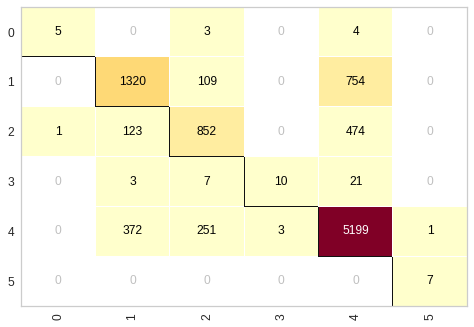

In [ ]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo,classes = classes)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

Utilizando a matriz de confusão conseguimos ver que apesar do modelo utilizado para tentar prever a Cor/raça de um morador de rua ter 0.7791668855386878 de acurácia fica claro que essa previsão não pode ser confiável. Isso ocorre porque os dados estão enviasados considerando que a maior parte dos entrevistados se declarou como parda(4) o modelo irá prever esse valor mesmo que não seja o caso (e quase sempre ele irá acertar)